#Mc'Donalds Market Segmentation

In [1]:
#Dataset: "mcdonalds.csv"
#After Deciding to segment(Step1), and Specifying Ideal Target Segment(Step2),
#in Step3 i.e, Data Collection, the dataset contains-
    #Responses from adult australian consumers=1453(rows)
    #Dataset Attributes(emerged from a qualitative study conducted in preparation of the survey study:
    #Yummy,
    #Convenient, 
    #Spicy, 
    #Fattening, 
    #Greasy, 
    #Fast, 
    #Cheap, 
    #Tasty, 
    #Expensive, 
    #Healthy, 
    #Disgusting
#Responses for each attribute are "Yes"(mcdonalds possess that attribute) or "No"(mcdonalds dont posses that attribute).

**importing necessary libs**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading dataset
df=pd.read_csv("mcdonalds.csv")

In [5]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
#getting basic informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
# out of total 15 columns, there are 11 segmentation variables,
# 1 numeric column "Age"
# 3 remaining variables shows the consumer ratings("Like"), No. of visits("VisitFrequency") and "Gender"
#lets count the total no. of distinct values in these 3 variables
print('Gender:\n',df.Gender.value_counts())


Gender:
 Female    788
Male      665
Name: Gender, dtype: int64


In [8]:
print('VisitFrequency :\n', df.VisitFrequency.value_counts())

VisitFrequency :
 Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64


In [9]:
print('Like:\n',df.Like.value_counts())

Like:
 +3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64


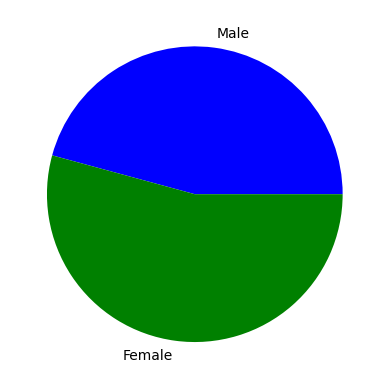

In [10]:
#lets plot the gender distribution on piechart
size=[df.query('Gender=="Male"').Gender.count(),df.query('Gender=="Female"').Gender.count()]
plt.pie(size,labels=["Male","Female"], colors=["blue","green"],)
plt.show()

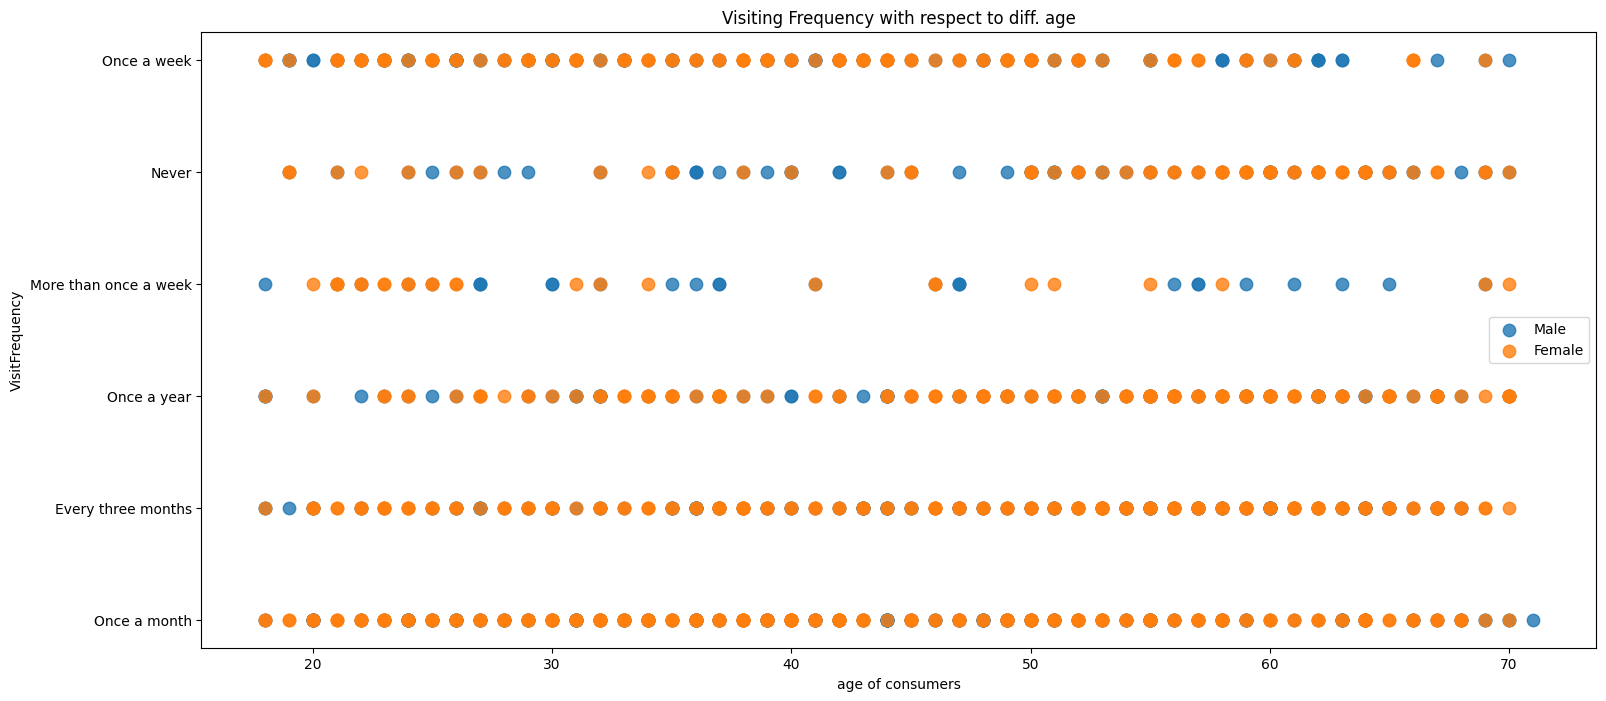

In [11]:
plt.figure(figsize=(18,8))
gender=['Male','Female']
for i in gender:
    plt.scatter(x='Age',y='VisitFrequency', data=df[df['Gender']==i], s=80, alpha=0.8, label = i, cmap="OrRd")
plt.legend()
plt.xlabel("age of consumers")
plt.ylabel("VisitFrequency")
plt.title("Visiting Frequency with respect to diff. age")
plt.show()

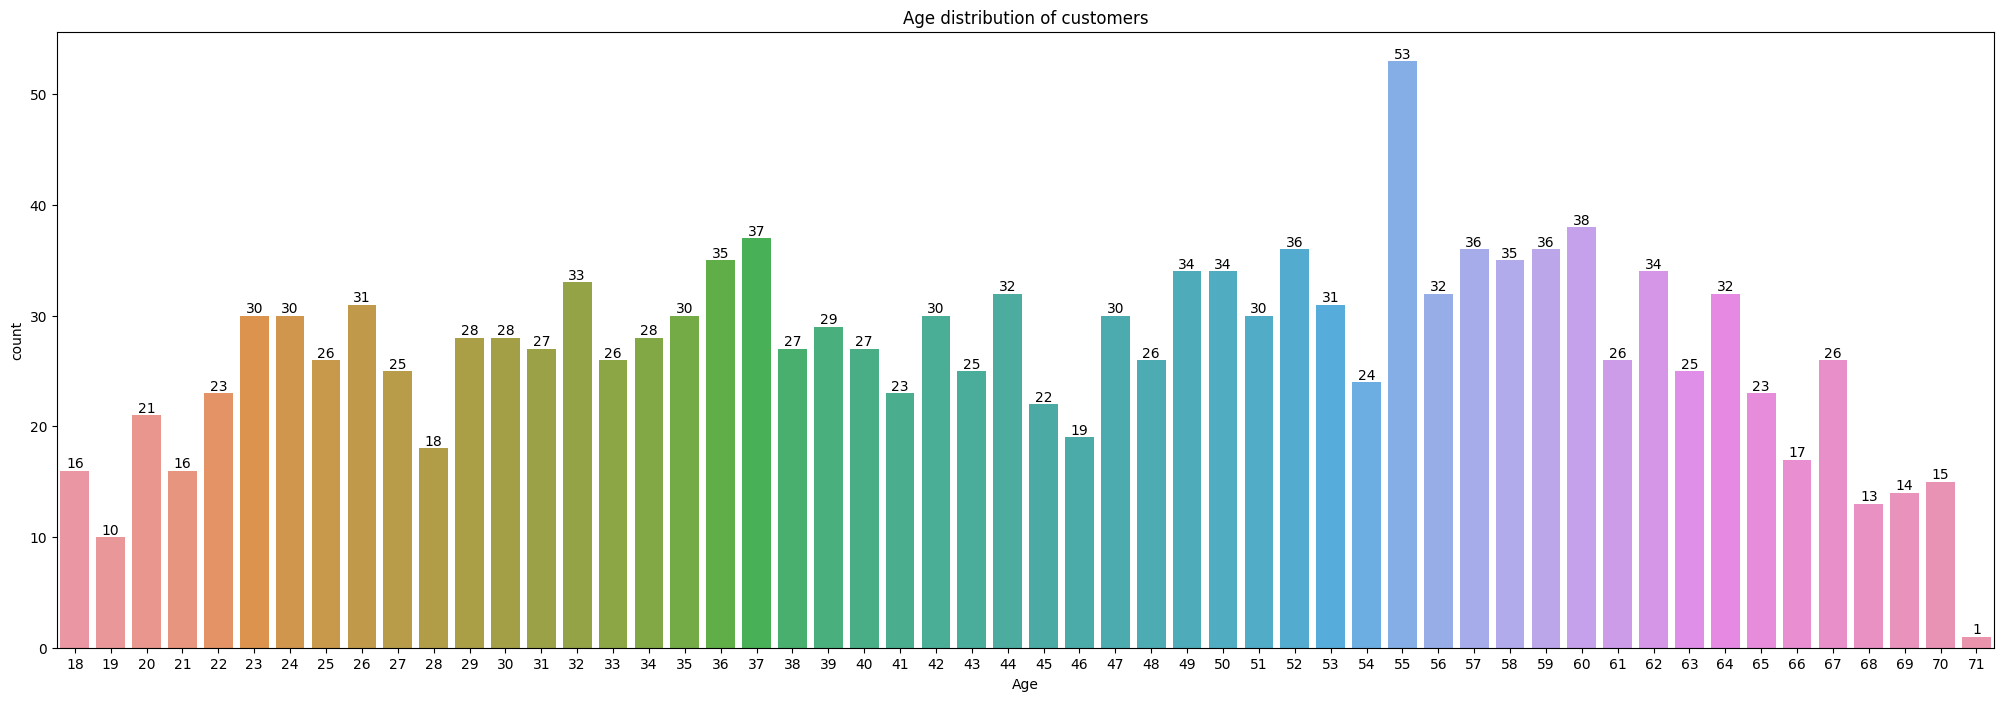

In [12]:
#visualizing "Age" column
plt.figure(figsize=(25, 8))
f = sns.countplot(x=df["Age"])
f.bar_label(f.containers[0], color="black")
plt.title('Age distribution of customers')
plt.show()

<Figure size 1800x800 with 0 Axes>

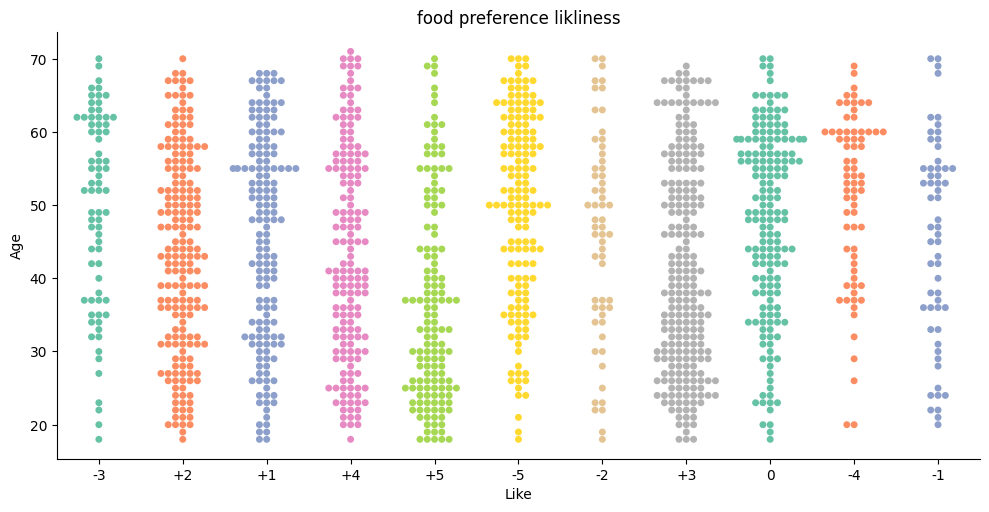

In [13]:

df['Like']= df['Like'].replace({'I hate it!-5':'-5','I love it!+5':'+5'})
#Like
plt.figure(figsize=(18,8))
sns.catplot(x="Like", y="Age",data=df, orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('food preference likliness')
plt.show()

In [14]:
#converting categorical cols into numeric ones
from sklearn.preprocessing import LabelEncoder
def label(x):
    df[x]=LabelEncoder().fit_transform(df[x])
    return df

category=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for i in category:
    label(i)

In [15]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


<Figure size 1000x1400 with 0 Axes>

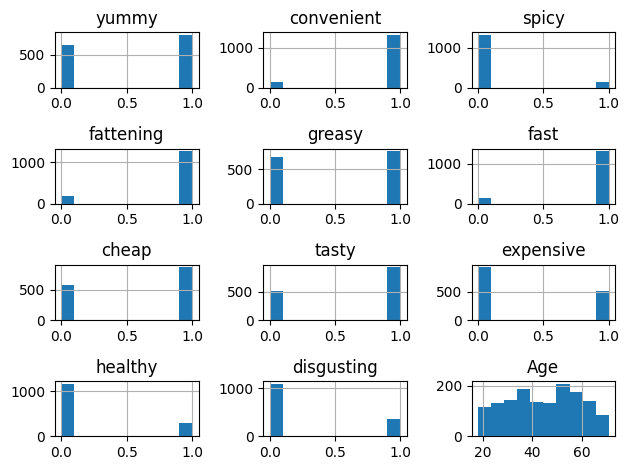

In [16]:
#plotting each variables on histogram
plt.figure(figsize=(10,14))
df.hist()
plt.tight_layout()
plt.show()

In [17]:
# selecting first 11 cols (segmentation variables)
df_11 = df.loc[:,category]

In [18]:
df_11

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [19]:
# converting these cols into array 
X=df.loc[:,category].values

In [20]:
X

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

**Principal Component Analysis**

In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_df=preprocessing.scale(X)

pca=PCA(n_components=11)
pc=pca.fit_transform(X)
names=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pc_df=pd.DataFrame(data=pc, columns=names)
pc_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [22]:
# Proportion of variance
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [23]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [24]:
# coefficient of correlation bw original attributes and the components
loadings=pca.components_
num_pc=pca.n_features_
pc_list=["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df=pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable']=df_11.columns.values
loadings_df=loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


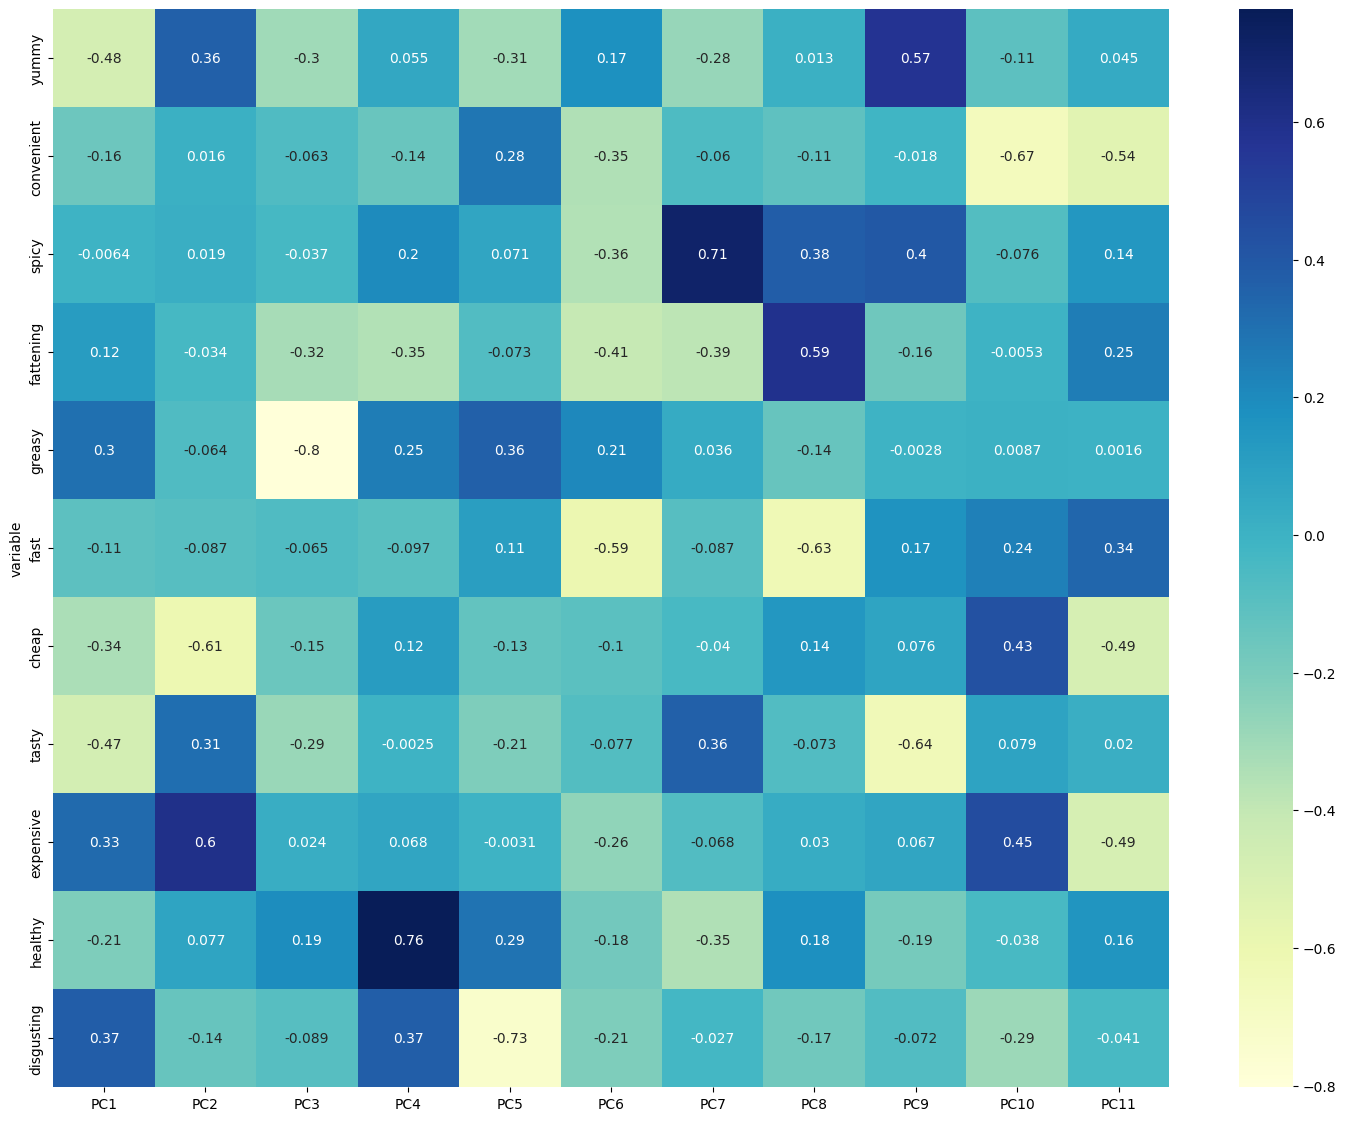

In [25]:
# plotting correlation matrix
plt.figure(figsize=(18,14))
ax=sns.heatmap(loadings_df, cmap="YlGnBu", annot=True)
plt.show()

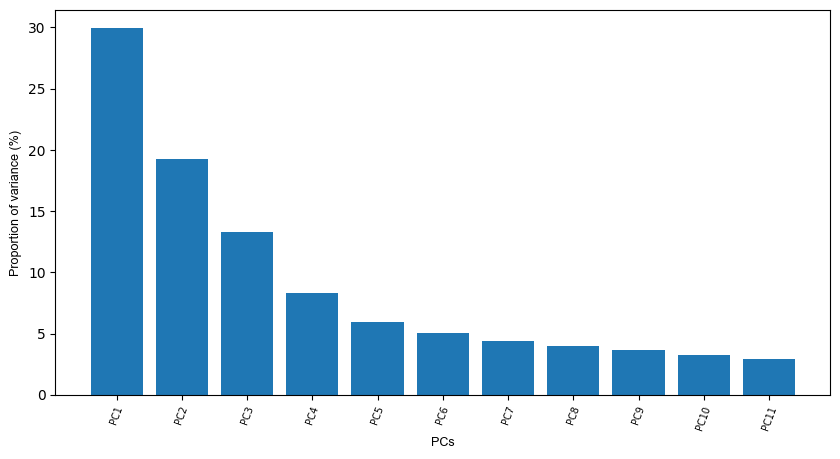

In [26]:
# screeplot for (Elbow test) 
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

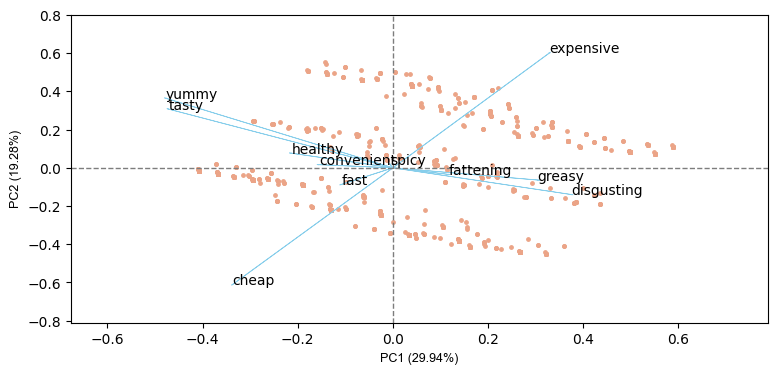

In [27]:
pca_scores = PCA().fit_transform(X) # for getting scores of PCA

# biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(9,4))

**Segment Extraction**

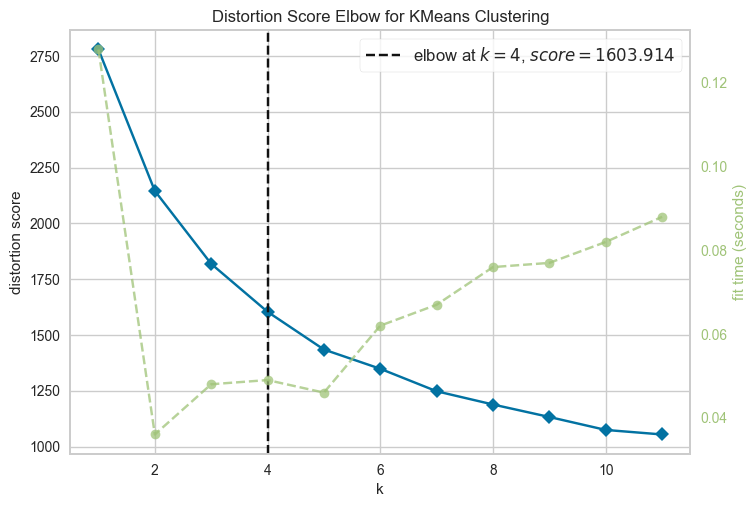

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# extracting segments using KMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model, k=(1,12)).fit(df_11)
visualizer.show()

**This KElbowVisualizer shows optimal clusters as 4**

**KMeans Clustering**

In [29]:
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_11)
df['cluster_num']=kmeans.labels_ # adding new col.
print(kmeans.labels_) # assigning labels to data points
print(kmeans.inertia_) # within-cluster sum of squares. 
print(kmeans.n_iter_) # no. of iterations kmeans algorithm runs to get minimum within-cluster sum of squares
print(kmeans.cluster_centers_) # centroids 

[2 0 0 ... 0 1 3]
1603.0604440558945
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [30]:
from collections import Counter
Counter(kmeans.labels_) # size of clusters

Counter({2: 304, 0: 323, 1: 580, 3: 246})

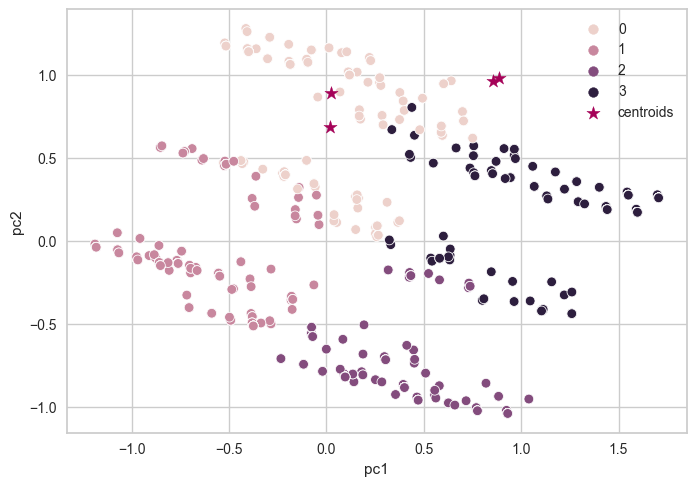

In [31]:
# Cluster visualization using scatterplot
sns.scatterplot(data=pc_df, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="*", c="m", s=100, label="centroids")
plt.legend()
plt.show()

**Describing Segments**

In [32]:
# using crosstab function for showing frequency with which "Like" coloum elements appears
crosstab=pd.crosstab(df['cluster_num'],df['Like'])
crosstab=crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']] # Reordering the columns
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


In [33]:
crosstab_gender=pd.crosstab(df['cluster_num'],df['Gender']) # segment vs gender
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


<Figure size 600x400 with 0 Axes>

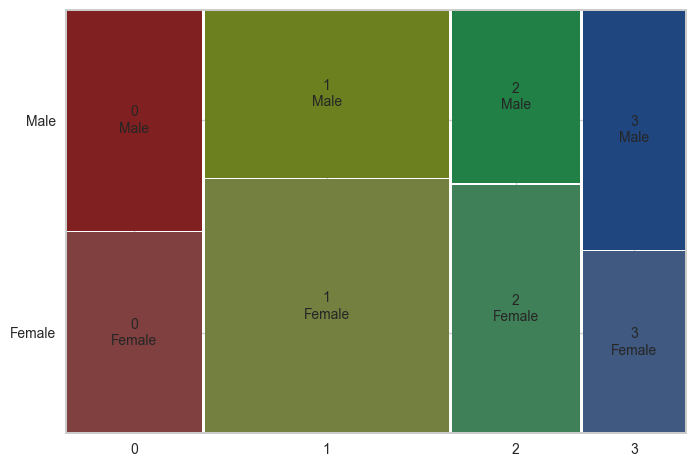

In [34]:
# mosaic plot for visualizing segments with respect to gender
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

plt.figure(figsize=(6,4))
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

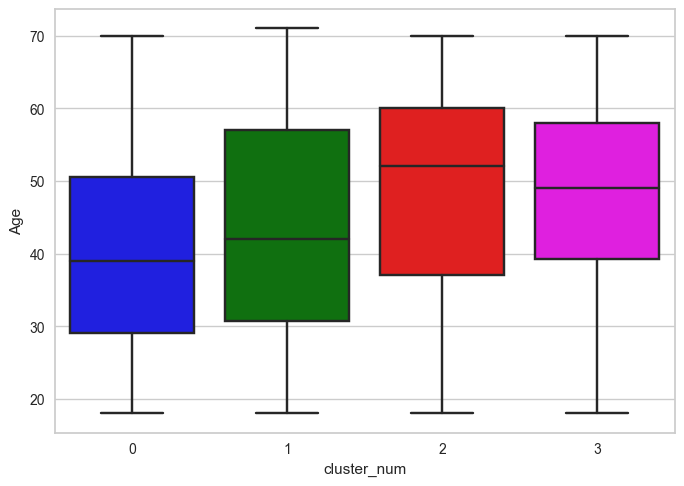

In [35]:
# visualizing "Age" column with the help of boxplots
sns.boxplot(data=df, x="cluster_num", y="Age", palette=["blue","green","red","magenta"])

**Selecting Target Segments**

In [36]:
# Encoding column Visit frequency.
df['VisitFrequency']=LabelEncoder().fit_transform(df['VisitFrequency'])
visits=df.groupby('cluster_num')['VisitFrequency'].mean() #applying mean for average visits per cluster
visits=visits.to_frame().reset_index()
visits

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [37]:
# encoding "Like" column
df['Like']=LabelEncoder().fit_transform(df['Like'])
likes=df.groupby('cluster_num')['Like'].mean()
likes=likes.to_frame().reset_index()
likes

,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [38]:
# encoding "Gender" column
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
gender=df.groupby('cluster_num')['Gender'].mean()
gender=gender.to_frame().reset_index()
gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [39]:
# compiling segments
segment=gender.merge(likes, on='cluster_num', how='left').merge(visits, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


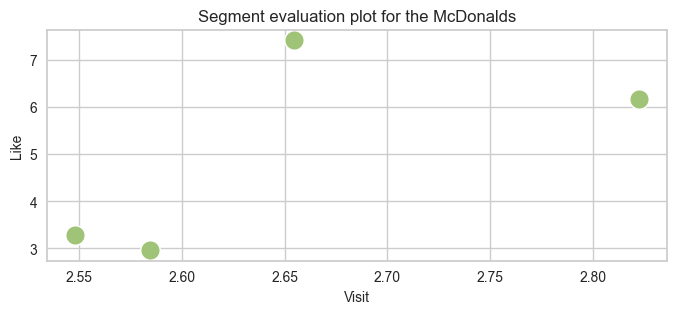

In [40]:
#Target segments
plt.figure(figsize=(8,3))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=200, color="g")
plt.title("Segment evaluation plot for the McDonalds", fontsize=12) 
plt.xlabel("Visit", fontsize=10) 
plt.ylabel("Like", fontsize=10) 
plt.show()


In [41]:
import scipy.cluster.hierarchy as shc

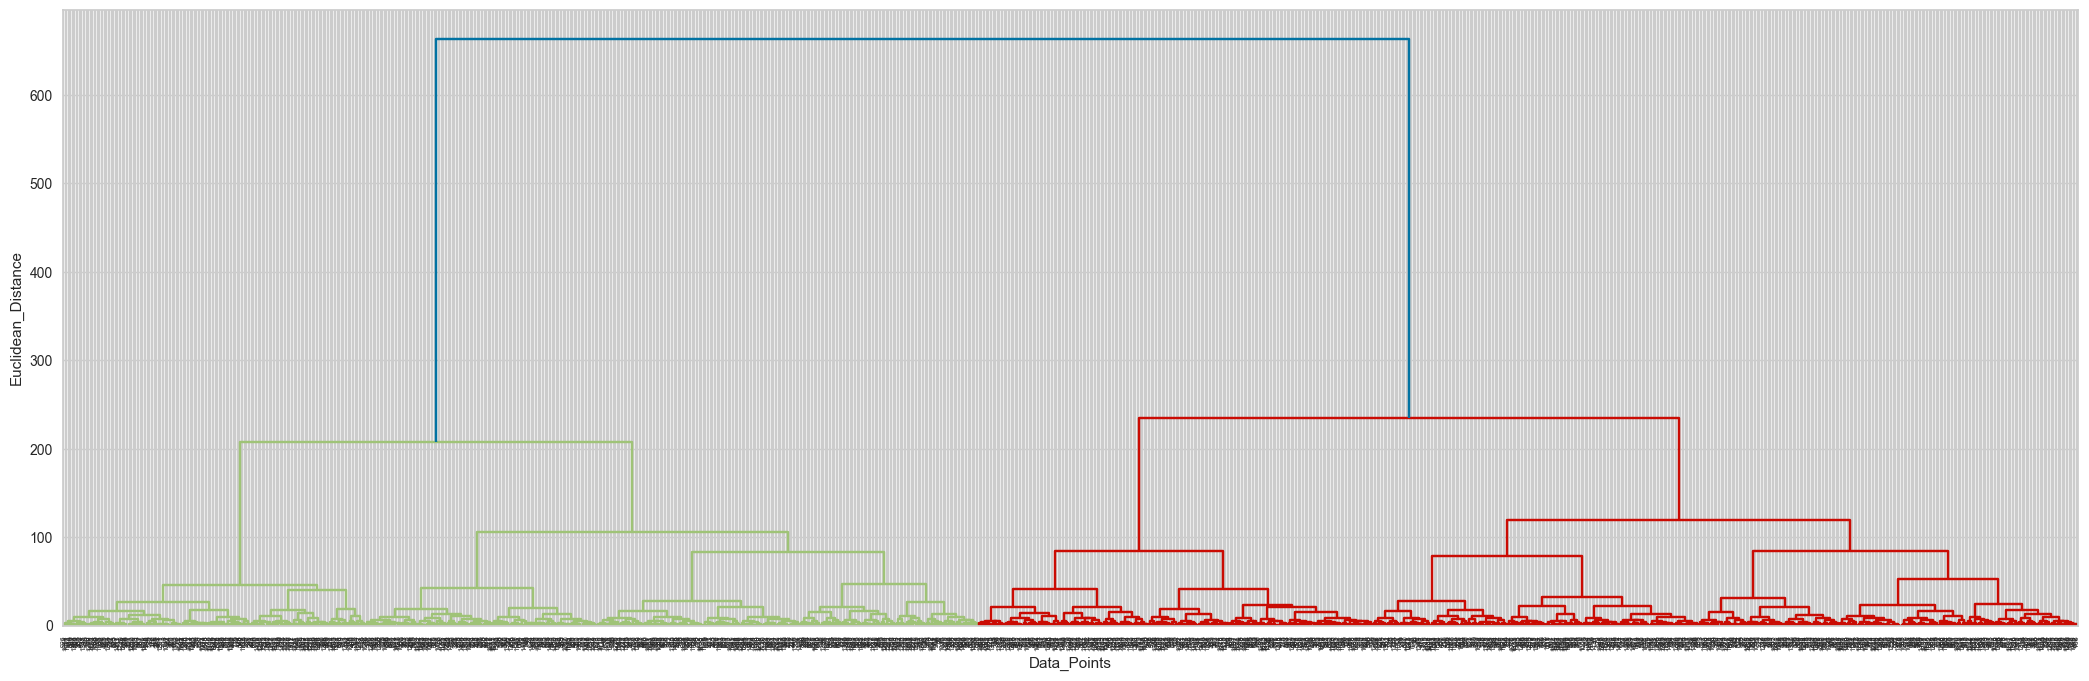

In [42]:
#plotting demogram for getting insight into and finding best clustering value
data_model=df.drop(['Gender'],axis=1)
merg=shc.linkage(data_model,method="ward")
plt.figure(figsize=(26,8))
shc.dendrogram(merg,leaf_rotation=90)
plt.xlabel("Data_Points")
plt.ylabel("Euclidean_Distance")
plt.show()

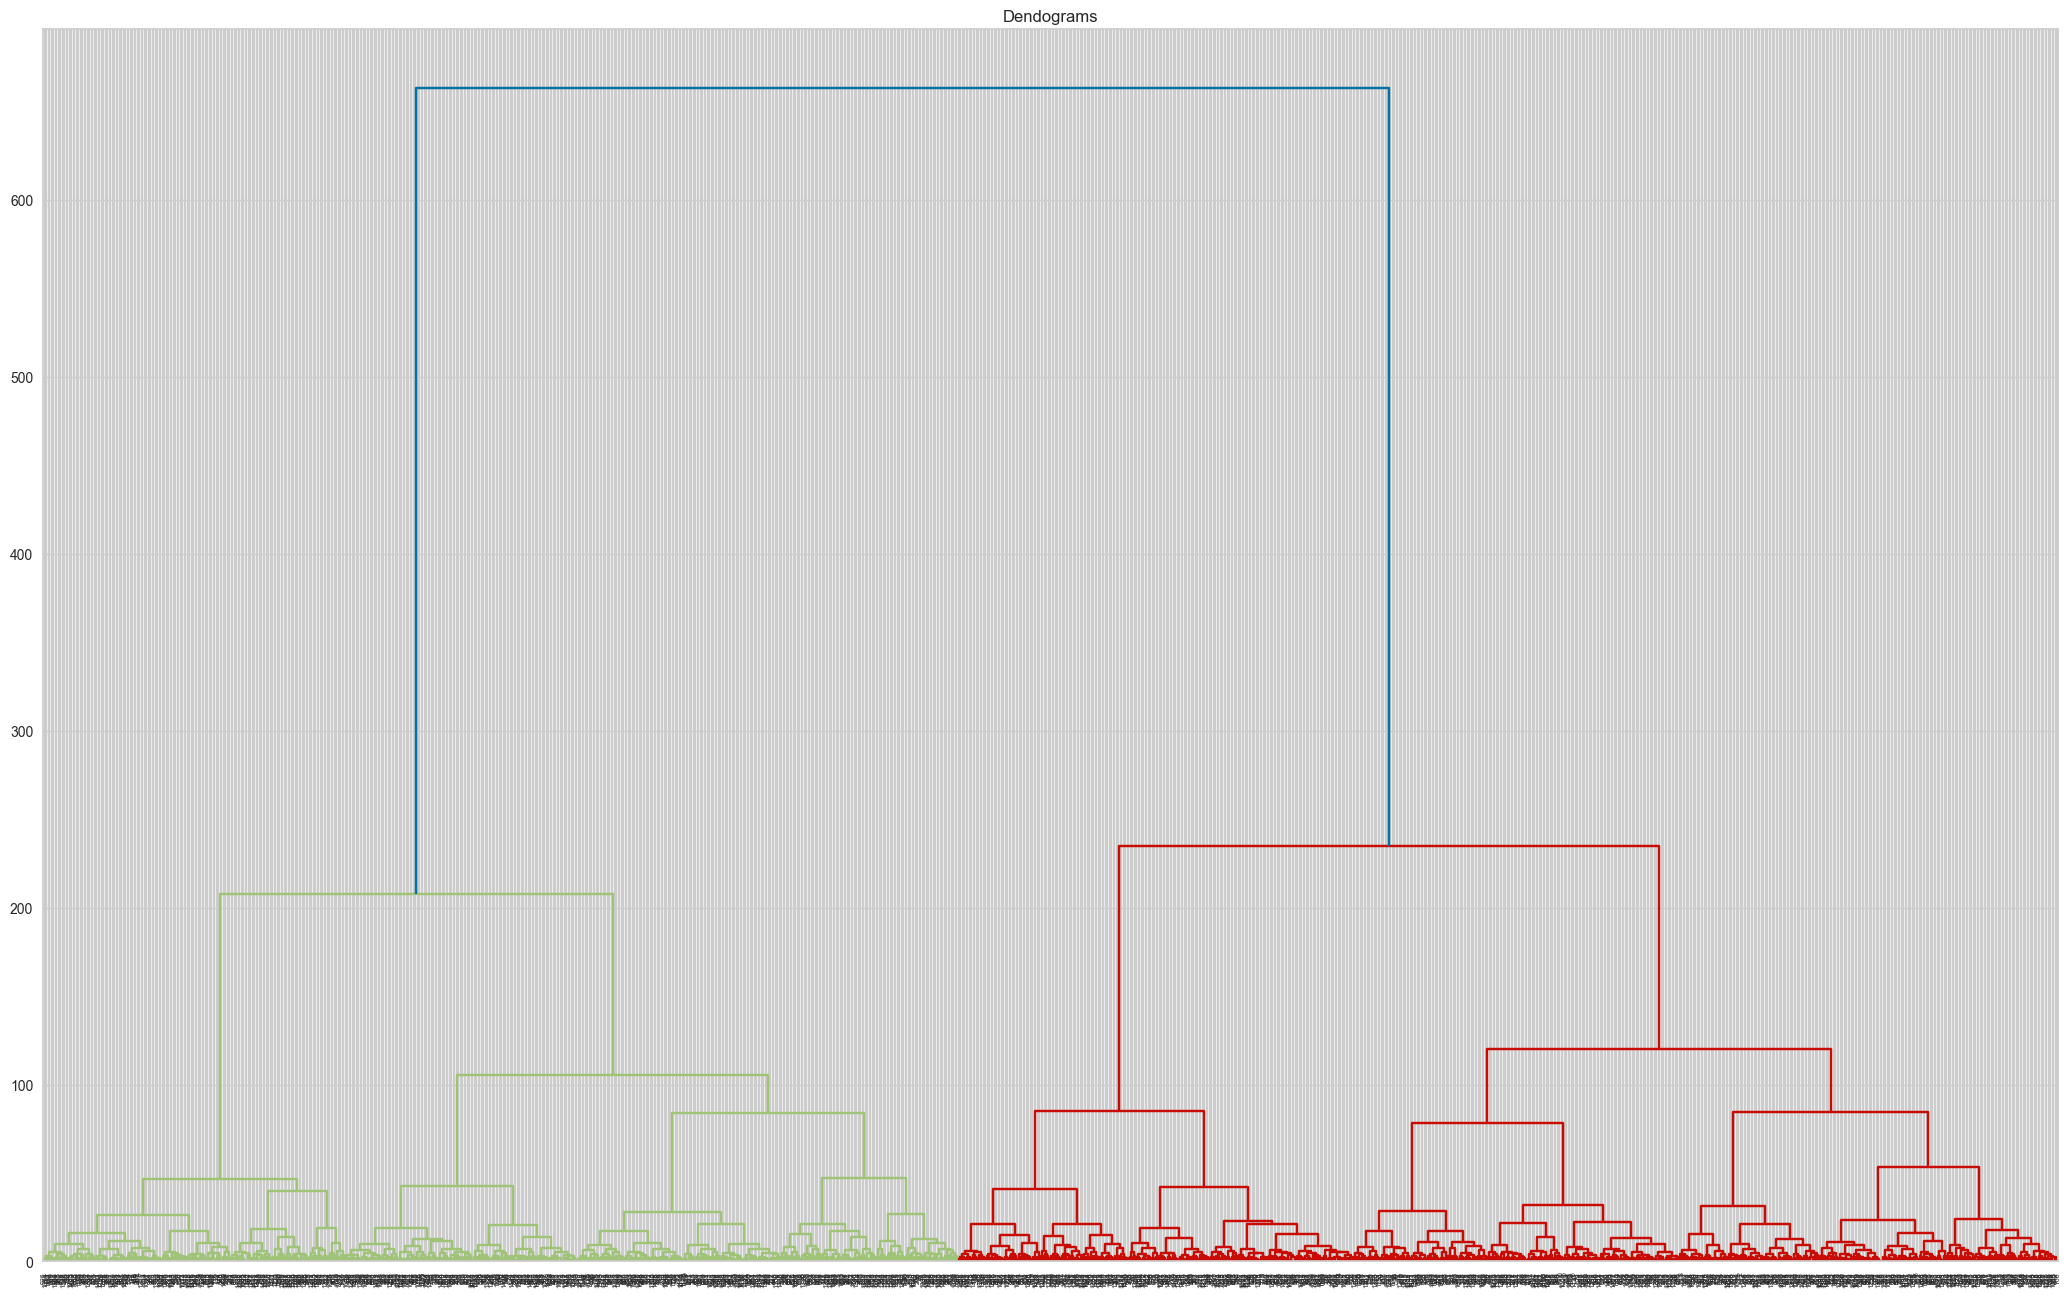

In [43]:
data_model=df.drop(['Gender'],axis=1)
plt.figure(figsize=(26, 16))  
plt.title("Dendograms")  
dendro=shc.dendrogram(shc.linkage(data_model, method='ward')) 

In [44]:
hierarchical_cluster=AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
hierarchical_cluster.fit_predict(data_model)

array([0, 2, 0, ..., 2, 1, 1], dtype=int64)

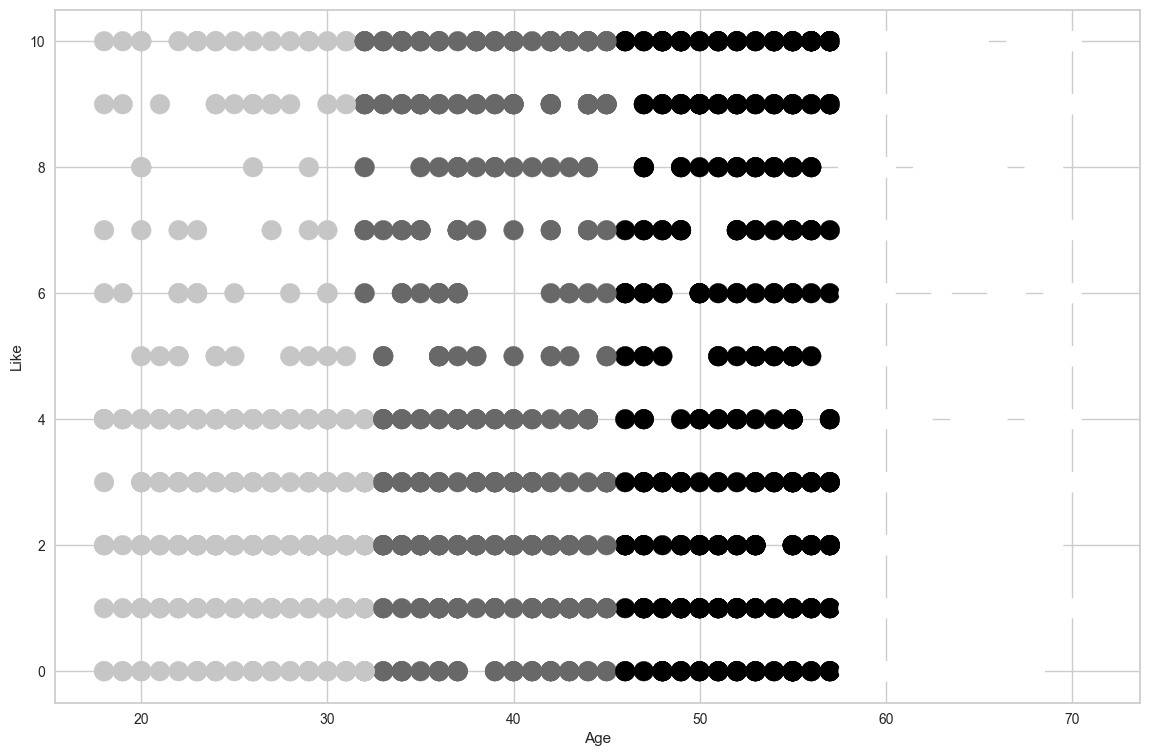

In [45]:
# creating model
kmeans=KMeans(n_clusters=4)
data_predict=kmeans.fit_predict(data_model)

plt.figure(figsize=(14,9))
plt.scatter( data = data_model, x='Age' ,y='Like', c=data_predict, s = 200 )
plt.xlabel("Age")
plt.ylabel("Like")
plt.show()

In [46]:
data_predict

array([0, 3, 0, ..., 3, 2, 1])

**Conclusion**

In [47]:
# Performed Segmentation on mcDonalds dataset, 
# identified segmentation variables,
# performed Principal Component Analysis on major variables,
# identified optimul no. of clusters as 4 by using KElbowVisualizer,
# lastly created model using scatter plot consisting of all 4 segments.